In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define a simple CNN with two convolutional layers
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(10, activation='softmax')
])

In [ ]:
# Load an example image and preprocess it for input to the model
img = plt.imread('BeatlesMainW.jpg')
img = np.expand_dims(img, axis=0)
img = tf.image.resize(img, [28, 28])
img = img / 255.0

1/1 [==============================] - 0s 65ms/step


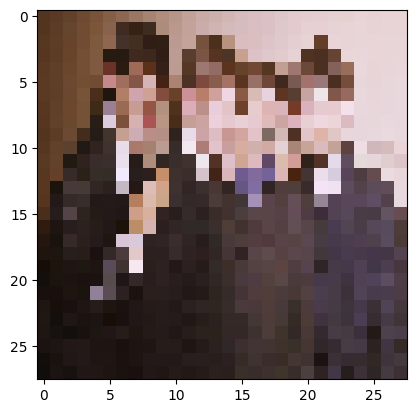

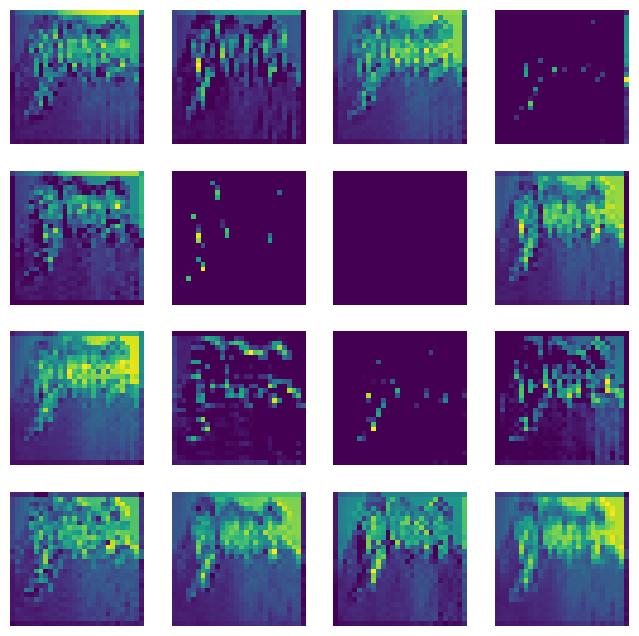

In [6]:
# Visualize the feature maps generated by the first convolutional layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img)

plt.imshow(img[0])
plt.show()

plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(activations[0][0, :, :, i])
  plt.axis('off')
plt.show()



In [9]:
model_dw = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28, 3)),
  layers.DepthwiseConv2D(3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(10, activation='softmax')
])

1/1 [==============================] - 0s 84ms/step


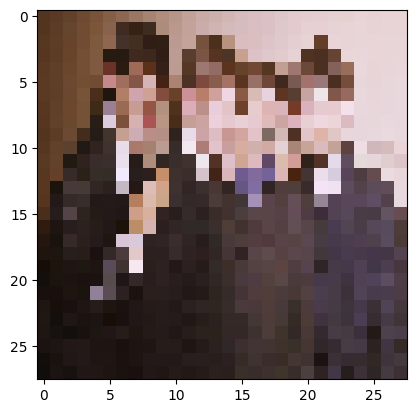

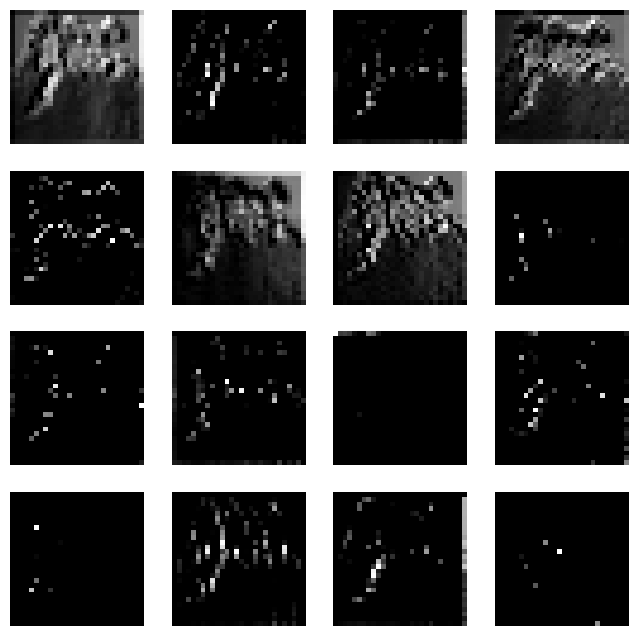

In [10]:
layer_outputs = [layer.output for layer in model_dw.layers]
activation_model = tf.keras.models.Model(inputs=model_dw.input, outputs=layer_outputs)
activations = activation_model.predict(img)

plt.imshow(img[0])
plt.show()

plt.figure(figsize=(8,8))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.imshow(activations[0][0, :, :, i], cmap='gray')
  plt.axis('off')
plt.show()